![title](images/header.png)

# Vd - Merging eSBAE with CEO data (phase I 2015-2020)
-------
This notebook merges validated data from the stratified random CEO data (2015-2022) with eSBAE points for estimation of areas
This script requires minimum an m16 instance and select the python 3 kernel
###### For more information contact aurelie.shapiro@fao.org or remi.dannunzio@fao.org

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Set the display option to a large value to prevent text wrapping
pd.set_option('display.max_colwidth', None)

#### combine all CEO sample files
download your CEO sample files from collect.earth and upload to SEPAL using FileZilla.
add as many files as you have projects

In [128]:
#identifier for country
iso = 'COG'

In [129]:
#DRC
#ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/ceo-CAFI-DDD-RDC-eSBAE-validation-1-sample-data.csv')
#ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/ceo-CAFI-DDD-RDC-eSBAE-validation-2-sample-data.csv')
#ceo3 = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/ceo-CAFI-DDD-RDC-eSBAE-validation-3-sample-data.csv')
#GAB
#ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-1-sample-data.csv')
#ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-2-sample-data.csv')
#ceo3 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-3-sample-data.csv')
#ceo4 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-4-sample-data.csv')
#ceo5 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-5-sample-data.csv')
#EQG
#ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/EQG/ceo-CAFI-DDD-Equatorial-Guinea-eSBAE-validation-1-sample-data.csv')
#ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/EQG/ceo-CAFI-DDD-Equatorial-Guinea-eSBAE-validation-2-sample-data.csv')
#COG
ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/COG/ceo-CAFI-DDD-République-Congo-eSBAE-validation-1-sample-data.csv')

In [130]:
column_names = ceo1.columns.tolist()
# Print the list of column names
print(column_names)

['plotid', 'sampleid', 'lon', 'lat', 'email', 'flagged', 'collection_time', 'analysis_duration', 'imagery_title', 'imagery_attributions', 'sample_geom', 'pl_aspect', 'pl_brightness_max', 'pl_red_mean', 'pl_greenness_max', 'pl_cusum_confidence', 'pl_cusum_change_date', 'pl_nir_max', 'pl_red_min', 'pl_bfast_means', 'pl_elevation', 'pl_red_sd', 'pl_cnc_1520', 'pl_swir1_sd', 'pl_index', 'pl_tmf_sub', 'pl_dw_tree_prob__min', 'pl_bs_slope_max', 'pl_red_max', 'pl_images', 'pl_dist', 'pl_bfast_magnitude', 'pl_ccdc_magnitude', 'pl_simple_combined', 'pl_tmf_defyear', 'pl_greenness_mean', 'pl_tmf_2019', 'pl_swir2_sd', 'pl_nir_sd', 'pl_gfc_tc00', 'pl_greenness_min', 'pl_tmf_degyear', 'pl_tmf_2020', 'pl_tmf_2017', 'pl_bs_slope_min', 'pl_lang_tree_height', 'pl_bs_slope_sd', 'pl_dw_class_mode', 'pl_swir1_mean', 'pl_wetness_sd', 'pl_bs_slope_mean', 'pl_ccdc_change_date', 'pl_dw_tree_prob_mean', 'pl_nir_mean', 'pl_dw_tree_prob__stddev', 'pl_tmf_2016', 'pl_nir_min', 'pl_esri_lc17', 'pl_wetness_mean', 'p

make a list of the ceo files for processing

In [131]:
#depends on how many files you have
#ceo_files = [ceo1, ceo2, ceo3, ceo4, ceo5]
#ceo_files = [ceo1, ceo2, ceo3]
#ceo_files = [ceo1,ceo2]
ceo_files = [ceo1]

##### add a column named "interpreted" which = 1 when the point has been validated in CEO, otherwise 0
count the number of validated points per ceo file
replace forest and non-forest types with codes

In [132]:
# List to store the modified DataFrames
modified_ceo_files = []

# Initialize collection counter
collection_counter = 1

for i, ceo in enumerate(ceo_files):
       
    # Sort the DataFrame by 'date' in descending order
    ceo.sort_values(by='collection_time', ascending=True, inplace=True)

    # Remove duplicates keeping the last occurrence (the most recent date)
    ceo.drop_duplicates(subset='pl_point_id', keep='first', inplace=True)

    # Reset the index
    ceo.reset_index(drop=True, inplace=True)
    
    # Add 'collection' column with an increasing number
    ceo['collection'] = collection_counter
    
    # Add 'interpreted' column with 1 when 'email' is not null, otherwise 0
    ceo['interpreted'] = np.where(ceo['email'].notna(), 1, 0)
    
    # Calculate total count for each 'interpreted' value
    interpreted_counts = ceo['interpreted'].value_counts().to_dict()
    
    # Append the modified DataFrame to the list
    modified_ceo_files.append(ceo)
    
    # Print count for the current DataFrame
    print(f"ceo {i + 1} # of validated points: {interpreted_counts.get(1, 0)}, # of not validated points: {interpreted_counts.get(0, 0)}")
    
    # Increment the collection counter
    collection_counter += 1

# Concatenate the modified DataFrames into one merged DataFrame
merged_ceo = pd.concat(modified_ceo_files, ignore_index=True)


# Specify the columns you want to keep in the merged DataFrame
columns_to_keep = ['plotid', 'sampleid', 'lon', 'lat', 'email', 'flagged', 'collection_time', 'analysis_duration', 
                    'sample_geom', 'pl_point_id', 'pl_chg_prob', 'pl_simple_combined', 'forêt ou non-forêt en 2015?', "Y'a t'il de la régéneration", 
                    'Changement entre 2015-2022', 'Type de Changement (2015-2022)', 'Exploitation forestière artisanale (<5ha)', 
                    'Activité minière artisanale', 'Infrastructure routière', 'Infrastructure d’urbanisation ou habitations', 
                    'Exploitation forestière industrielle (>5ha)', 'Autre moteur', 'Descriptif autre moteur', 'Activité minière industrielle', 
                    'Agriculture industrielle', 'Agriculture paysanne', 'Année de Changement', 'Type de non-forêt en 2015', 'Type de forêt en 2015', 'Commentaires', 'collection', 'interpreted']

# Select only the specified columns
merged_ceo = merged_ceo[columns_to_keep]

# Create a dictionary to map old column names to new column names
column_mapping = {
    'pl_point_id': 'point_id',
    'pl_chg_prob': 'chg_prob', 
    'pl_simple_combined': 'simple_combined', 
    'pl_strata': 'stratum',
    'forêt ou non-forêt en 2015?': 'Ref_FNF_2015', 
    "Y'a t'il de la régéneration": 'Ref_Regeneration',
    'Changement entre 2015-2022': 'Ref_Change_1522', 
    'Type de Changement (2015-2022)': 'Ref_Change_Type_1522', 
    'Exploitation forestière artisanale (<5ha)': 'ArtFor',
    'Activité minière artisanale': 'ArtMine',
    'Infrastructure routière': 'InfraR', 
    'Infrastructure d’urbanisation ou habitations': 'Urb',
    'Exploitation forestière industrielle (>5ha)':'IndFor', 
    'Autre moteur': 'Other', 
    'Descriptif autre moteur': 'Other_Desc', 
    'Activité minière industrielle': 'IndMine', 
    'Agriculture industrielle': 'IndAg', 
    'Agriculture paysanne': 'ArtAg', 
    'Année de Changement': 'Ref_Year', 
    'Type de non-forêt en 2015':'Ref_NFtype', 
    'Type de forêt en 2015':'Ref_Ftype'
    #add other columns as needed
    #,'NOM': 'Province' # DRC province
}

# Use the rename() method to rename the columns
merged_ceo = merged_ceo.rename(columns=column_mapping)

# Define the replacements as a dictionary
replace_dict = {
    'Ref_FNF_2015': {'non-forêt': '0', 'forêt': '1'},
    'Ref_Ftype': {'1 - forêt dense': '1', '2 - forêt dense sèche': '2', '3 - forêt secondaire': '3','4 - forêt claire sèche': '4','7 - forêt mangrove': '7',
                 '8 - forêt marécageuse': '8', '9 - forêt galérie': '9','10 - plantation forestière': '10', '11- savane arborée': '11'},
    'Ref_NFtype': {'12 - savane arbustive': '12', '13 - savane herbacée': '13', '14 - prairie aquatique': '14', '15 - sol nu végétation éparse': '15',
                  '16 - terres cultivées': '16', '17 - zone baties': '17', '18 - eau': '18'},
    'Ref_Change_1522': {'oui':'1','non':'0','':'0'},
    'ArtFor':{'oui':'1','non':'0','':'0'},
    'IndFor':{'oui':'1','non':'0','':'0'},
    'ArtAg':{'oui':'1','non':'0','':'0'},
    'IndAg':{'oui':'1','non':'0','':'0'},
    'ArtMine':{'oui':'1','non':'0','':'0'},
    'IndMine':{'oui':'1','non':'0','':'0'},
    'Urb':{'oui':'1','non':'0','':'0'},
    'InfraR':{'oui':'1','non':'0','':'0'},
    'Other':{'oui':'1','non':'0','':'0'}
}

# Use the replace() method to replace strings in specified columns
merged_ceo.replace(replace_dict, inplace=True)


columns_to_fill = ['Ref_Change_1522','ArtFor','IndFor','IndAg','ArtMine','IndMine','Urb','InfraR','Other']
# Set NaN values in the selected columns to 0
merged_ceo[columns_to_fill] = merged_ceo[columns_to_fill].fillna('0')

ceo 1 # of validated points: 403, # of not validated points: 95


remove non validated points and remove duplicates

In [133]:
merged_ceo_interpreted = merged_ceo[merged_ceo['interpreted'] == 1]

In [134]:
ceo_column_names = merged_ceo_interpreted.columns.tolist()
# Print the list of column names
print(ceo_column_names)

['plotid', 'sampleid', 'lon', 'lat', 'email', 'flagged', 'collection_time', 'analysis_duration', 'sample_geom', 'point_id', 'chg_prob', 'simple_combined', 'Ref_FNF_2015', 'Ref_Regeneration', 'Ref_Change_1522', 'Ref_Change_Type_1522', 'ArtFor', 'ArtMine', 'InfraR', 'Urb', 'IndFor', 'Other', 'Other_Desc', 'IndMine', 'IndAg', 'ArtAg', 'Ref_Year', 'Ref_NFtype', 'Ref_Ftype', 'Commentaires', 'collection', 'interpreted']


In [135]:
merged_ceo_interpreted.head()

,plotid,sampleid,lon,lat,email,flagged,collection_time,analysis_duration,sample_geom,point_id,chg_prob,simple_combined,Ref_FNF_2015,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtAg,Ref_Year,Ref_NFtype,Ref_Ftype,Commentaires,collection,interpreted
0,542426,542426,11.279983,-3.903345,aurelie.shapiro@fao.org,False,2023-06-23 15:31,19.1 secs,POINT(11.279983 -3.903345),542426,0.04,0.04,1,NaN,0,NaN,0,0,0,0,0,0,NaN,0,0,NaN,NaN,NaN,1,,1,1
1,445810,445810,13.299947,2.094921,aurelie.shapiro@fao.org,False,2023-06-23 15:31,26.5 secs,POINT(13.299947 2.094921),445810,0.01,0.01,1,NaN,0,NaN,0,0,0,0,0,0,NaN,0,0,NaN,NaN,NaN,8,,1,1
2,543543,543543,11.589578,-3.653444,amelie.arquero@gmail.com,False,2023-07-19 11:11,655.5 secs,POINT(11.589578 -3.653444),543543,0.06,0.06,1,NaN,0,NaN,0,0,0,0,0,0,NaN,0,0,NaN,NaN,NaN,1,rentrez vos commentaires,1,1
3,544052,544052,11.654529,-3.682303,menguekarel@gmail.com,False,2023-07-19 12:17,1325.0 secs,POINT(11.654529 -3.682303),544052,0.05,0.05,1,NaN,0,NaN,0,0,0,0,0,0,NaN,0,0,NaN,NaN,NaN,1,rentrez vos commentaires,1,1
4,544348,544348,11.514933,-4.047530,menguekarel@gmail.com,False,2023-07-19 12:39,1326.1 secs,POINT(11.514933 -4.04753),544348,0.06,0.06,0,non,0,NaN,0,0,0,0,0,0,NaN,0,0,NaN,NaN,13,NaN,rentrez vos commentaires,1,1


In [136]:
merged_ceo_interpreted = merged_ceo_interpreted.sort_values(by='collection', ascending=True)

# Remove duplicates keeping the last occurrence (the most recent date)
merged_ceo_nodup = merged_ceo_interpreted.drop_duplicates(subset='point_id', keep='first')

# Reset the index
merged_ceo_nodup = merged_ceo_nodup.reset_index(drop=True)

##### count points in different categories

In [137]:
merged_ceo_nodup['interpreted'].value_counts(dropna=False)

interpreted
1    403
Name: count, dtype: int64

In [138]:
pd.pivot_table(merged_ceo_nodup,values='point_id',index=['Ref_Change_1522'],columns=['interpreted'],aggfunc="count")

interpreted,1
Ref_Change_1522,
0,393
1,10


In [139]:
merged_ceo_nodup['Ref_FNF_2015'].value_counts(dropna=False)

Ref_FNF_2015
1    260
0    143
Name: count, dtype: int64

In [140]:
merged_ceo_nodup['Ref_Change_Type_1522'].value_counts(dropna=False)

Ref_Change_Type_1522
NaN              393
déforestation      9
dégradation        1
Name: count, dtype: int64

In [141]:
merged_ceo_nodup['collection'].value_counts(dropna=False)

collection
1    403
Name: count, dtype: int64

##### create a LC type column

In [142]:
merged_ceo_nodup['Ref_LCtype'] = merged_ceo_nodup['Ref_Ftype'].fillna(merged_ceo_nodup['Ref_NFtype'])
merged_ceo_nodup['Ref_LCtype'].value_counts(dropna=False)

Ref_LCtype
1     157
13     77
8      47
12     41
3      24
9      24
16     10
15      9
4       7
14      3
17      2
2       1
18      1
Name: count, dtype: int64

##### Check if values in 'pointid' are unique

In [143]:
# this might take some time
unique_check = merged_ceo_nodup['point_id'].nunique() == len(merged_ceo_nodup['point_id'])

# Print the result
if unique_check:
    print("All values are unique!")
else:
    print("F$%§!")

All values are unique!


##### if there are duplicates determine which points and which project (collection) and fix these in CEO: find the point id and enter the same correct interpretation for both users

In [144]:
# Find duplicate values in the 'ID' column
#duplicate_ids = merged_ceo_nodup[merged_ceo_nodup.duplicated(subset='point_id', keep='first')]

# If you want to print specific columns along with duplicates, you can do:
# For example, print only 'ID' and 'Name' columns
#print("\nDuplicate Rows with 'ID' and 'Name':")
#print(duplicate_ids[['point_id', 'collection']])
#len(duplicate_ids)

In [145]:
#merged_ceo_nodup.head()

## add new columns for change and year

clean up columns and replace values

In [146]:
def f(x):
  if x['Ref_FNF_2015'] == '0' : return 'NF'
  elif x['Ref_Change_Type_1522'] == 'déforestation': return 'Def'
  elif x['Ref_Change_Type_1522'] == 'dégradation' : return 'Deg'
  else: return 'Stable'

merged_ceo_nodup['Ref_Change_Type_1522'] = merged_ceo_nodup.apply(f, axis=1)
merged_ceo_nodup['Ref_Change_Type_1522'].value_counts()

Ref_Change_Type_1522
Stable    250
NF        143
Def         9
Deg         1
Name: count, dtype: int64

In [147]:
def y(x):
  if x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2016: return 'Def2016'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2017: return 'Def2017'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2018: return 'Def2018'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2019: return 'Def2019'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2020: return 'Def2020'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2021: return 'Def2021'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2022: return 'Def2022'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2016: return 'Deg2016'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2017: return 'Deg2017'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2018: return 'Deg2018'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2019: return 'Deg2019'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2020: return 'Deg2020'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2021: return 'Deg2021'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2022: return 'Deg2022'
  elif x['Ref_Change_Type_1522'] == 'NF' : return 'NF'
  elif x['Ref_Change_Type_1522'] == 'Stable' : return 'Stable'
  else: return ''

merged_ceo_nodup['Ref_Change_Year_1522'] = merged_ceo_nodup.apply(y, axis=1)

annual_counts = merged_ceo_nodup['Ref_Change_Year_1522'].value_counts()
annual_counts = annual_counts.sort_index()
print(annual_counts)

Ref_Change_Year_1522
Def2016      2
Def2017      2
Def2018      2
Def2019      1
Def2020      1
Def2021      1
Deg2016      1
NF         143
Stable     250
Name: count, dtype: int64


In [148]:
annual_counts.sum()

403

In [149]:
pd.pivot_table(merged_ceo_nodup,values='point_id',index=['Ref_Change_Year_1522'],columns=['interpreted'],aggfunc="count",margins=True,
                             margins_name='Total')

interpreted,1,Total
Ref_Change_Year_1522,,
Def2016,2,2
Def2017,2,2
Def2018,2,2
Def2019,1,1
Def2020,1,1
Def2021,1,1
Deg2016,1,1
NF,143,143
Stable,250,250


In [150]:
pd.pivot_table(merged_ceo_nodup,values='point_id',index=['Ref_Change_Type_1522'],columns=['interpreted'],aggfunc="count",margins=True,
                             margins_name='Total')

interpreted,1,Total
Ref_Change_Type_1522,,
Def,9,9
Deg,1,1
NF,143,143
Stable,250,250
Total,403,403


In [151]:
merged_ceo_nodup['Def2016'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2016', 1, 0)
merged_ceo_nodup['Def2017'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2017', 1, 0)
merged_ceo_nodup['Def2018'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2018', 1, 0)
merged_ceo_nodup['Def2019'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2019', 1, 0)
merged_ceo_nodup['Def2020'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2020', 1, 0)
merged_ceo_nodup['Def2021'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2021', 1, 0)
merged_ceo_nodup['Def2022'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Def2022', 1, 0)

In [152]:
merged_ceo_nodup['Deg2016'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2016', 1, 0)
merged_ceo_nodup['Deg2017'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2017', 1, 0)
merged_ceo_nodup['Deg2018'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2018', 1, 0)
merged_ceo_nodup['Deg2019'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2019', 1, 0)
merged_ceo_nodup['Deg2020'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2020', 1, 0)
merged_ceo_nodup['Deg2021'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2021', 1, 0)
merged_ceo_nodup['Deg2022'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Deg2022', 1, 0)

In [153]:
merged_ceo_nodup['Defall'] = np.where(merged_ceo_nodup['Ref_Change_Type_1522'] == 'Def', 1, 0)
merged_ceo_nodup['Degall'] = np.where(merged_ceo_nodup['Ref_Change_Type_1522'] == 'Deg', 1, 0)

In [154]:
merged_ceo_nodup['Stable'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'Stable', 1, 0)
merged_ceo_nodup['NF'] = np.where(merged_ceo_nodup['Ref_Change_Year_1522'] == 'NF', 1, 0)

In [155]:
merged_ceo_column_names = merged_ceo_nodup.columns.tolist()
# Print the list of column names
print(merged_ceo_column_names)

['plotid', 'sampleid', 'lon', 'lat', 'email', 'flagged', 'collection_time', 'analysis_duration', 'sample_geom', 'point_id', 'chg_prob', 'simple_combined', 'Ref_FNF_2015', 'Ref_Regeneration', 'Ref_Change_1522', 'Ref_Change_Type_1522', 'ArtFor', 'ArtMine', 'InfraR', 'Urb', 'IndFor', 'Other', 'Other_Desc', 'IndMine', 'IndAg', 'ArtAg', 'Ref_Year', 'Ref_NFtype', 'Ref_Ftype', 'Commentaires', 'collection', 'interpreted', 'Ref_LCtype', 'Ref_Change_Year_1522', 'Def2016', 'Def2017', 'Def2018', 'Def2019', 'Def2020', 'Def2021', 'Def2022', 'Deg2016', 'Deg2017', 'Deg2018', 'Deg2019', 'Deg2020', 'Deg2021', 'Deg2022', 'Defall', 'Degall', 'Stable', 'NF']


###### import cleaned CEO data if already available

In [87]:
#merged_ceo_nodup = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/GAB_all_ceo_1522_clean.csv')
#merged_ceo_nodup = pd.read_csv('/home/sepal-user/module_results/esbae/COG/COG_all_ceo_1522_1622_clean.csv')

In [88]:
#column_shape = esbae['stratum'].shape

# Check if the column is one-dimensional
#if len(column_shape) == 1:
#    print("The column is one-dimensional.")
#    print("Number of elements:", column_shape[0])
#else:
#    print("The column is not one-dimensional.")
#    print("Shape:", column_shape)

#### read all esbae points with augmented data (output from script 5b)

In [156]:
# Read the CSV files
#DRC
#esbae = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/DRC_esbae_1520_model.csv')
#GAB
#esbae = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/GAB_esbae_1520_model.csv')
#COG
esbae = pd.read_csv('/home/sepal-user/module_results/esbae/COG/COG_esbae_1520_model.csv')
#EQG
#esbae = pd.read_csv('/home/sepal-user/module_results/esbae/EQG/EQG_esbae_1520_model.csv')
#CMR
#esbae = pd.read_csv('/home/sepal-user/module_results/esbae/CMR/CMR_esbae_1520_model.csv')
#CAR
#esbae = pd.read_csv('/home/sepal-user/module_results/esbae/CAR/CAR_esbae_1520_model.csv')
len(esbae)

291595

##### Rename columns to be same as ceo file 

In [157]:
esbae = esbae.rename(columns={'PLOTID': 'plotid'})
esbae = esbae.rename(columns={'LAT': 'lat'})
esbae = esbae.rename(columns={'LON': 'lon'})

In [158]:
print(esbae.dtypes)

images                    int64
mon_images                int64
bfast_change_date       float64
bfast_magnitude         float64
bfast_means             float64
cusum_change_date       float64
cusum_confidence        float64
cusum_magnitude         float64
red_mean                float64
red_sd                  float64
red_min                 float64
red_max                 float64
nir_mean                float64
nir_sd                  float64
nir_min                 float64
nir_max                 float64
swir1_mean              float64
swir1_sd                float64
swir1_min               float64
swir1_max               float64
swir2_mean              float64
swir2_sd                float64
swir2_min               float64
swir2_max               float64
ndfi_mean               float64
ndfi_sd                 float64
ndfi_min                float64
ndfi_max                float64
brightness_mean         float64
brightness_sd           float64
brightness_min          float64
brightne

In [159]:
len(esbae)

291595

### Merge ceo and sbae tables
replace validated points in esbae points

In [160]:
#make list of point_ids of validated points
validated_id_list = merged_ceo_nodup['point_id'].tolist()
len(validated_id_list)

403

In [161]:
# Merge ceo and sbae on "pointid" with an outer join
esbae_ceo = pd.merge(esbae, merged_ceo_nodup, on='point_id', how='outer')

In [162]:
print(esbae_ceo.dtypes)

images                    int64
mon_images                int64
bfast_change_date       float64
bfast_magnitude         float64
bfast_means             float64
cusum_change_date       float64
cusum_confidence        float64
cusum_magnitude         float64
red_mean                float64
red_sd                  float64
red_min                 float64
red_max                 float64
nir_mean                float64
nir_sd                  float64
nir_min                 float64
nir_max                 float64
swir1_mean              float64
swir1_sd                float64
swir1_min               float64
swir1_max               float64
swir2_mean              float64
swir2_sd                float64
swir2_min               float64
swir2_max               float64
ndfi_mean               float64
ndfi_sd                 float64
ndfi_min                float64
ndfi_max                float64
brightness_mean         float64
brightness_sd           float64
brightness_min          float64
brightne

In [163]:
#check if missing counts
#missing_strata = esbae_ceo['stratum_x'].isna().sum()

# Print the counts
#print(missing_strata)

In [164]:
# Fill NaN values in 'stratum' if missing
#esbae_ceo['stratum'] = esbae_ceo['stratum_x'].fillna(esbae_ceo['stratum_y'])

In [165]:
len(esbae_ceo)

291595

In [166]:
esbae_ceo.head()

,images,mon_images,bfast_change_date,bfast_magnitude,bfast_means,cusum_change_date,cusum_confidence,cusum_magnitude,red_mean,red_sd,red_min,red_max,nir_mean,nir_sd,nir_min,nir_max,swir1_mean,swir1_sd,swir1_min,swir1_max,swir2_mean,swir2_sd,swir2_min,swir2_max,ndfi_mean,ndfi_sd,ndfi_min,ndfi_max,brightness_mean,brightness_sd,brightness_min,brightness_max,greenness_mean,greenness_sd,greenness_min,greenness_max,wetness_mean,wetness_sd,wetness_min,wetness_max,bs_slope_mean,bs_slope_sd,bs_slope_max,bs_slope_min,ewma_jrc_date,ewma_jrc_change,ewma_jrc_magnitude,mosum_jrc_date,mosum_jrc_change,mosum_jrc_magnitude,cusum_jrc_date,cusum_jrc_change,cusum_jrc_magnitude,ccdc_change_date,ccdc_magnitude,aspect,dw_class_mode,dw_tree_prob__max,dw_tree_prob__min,dw_tree_prob__stdDev,dw_tree_prob_mean,elevation,esa_lc20,esa_lc21,esri_lc17,esri_lc18,esri_lc19,esri_lc20,esri_lc21,gfc_gain,gfc_loss,gfc_lossyear,gfc_tc00,lang_tree_height,potapov_tree_height,slope,tmf_2016,tmf_2017,tmf_2018,tmf_2019,tmf_2020,tmf_defyear,tmf_degyear,tmf_main,tmf_sub,geometry,point_id,Change_Bin,Def_Bin,Deg_Bin,CAFI_LC_2015,chg_prob_cafi1520,def_prob_cafi1520,deg_prob_cafi1520,simple_combined_x,stratum,kmeans_chg,kmeans_def,kmeans_deg,plotid_x,lon_x,lat_x,plotid_y,sampleid,lon_y,lat_y,email,flagged,collection_time,analysis_duration,sample_geom,chg_prob,simple_combined_y,Ref_FNF_2015,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtAg,Ref_Year,Ref_NFtype,Ref_Ftype,Commentaires,collection,interpreted,Ref_LCtype,Ref_Change_Year_1522,Def2016,Def2017,Def2018,Def2019,Def2020,Def2021,Def2022,Deg2016,Deg2017,Deg2018,Deg2019,Deg2020,Deg2021,Deg2022,Defall,Degall,Stable,NF
0,33,24,2016.068,-1609.672119,-4.288966,2023.252,0.326969,3632.791667,9425.458333,468.569922,8254.0,10000.0,9425.458333,468.569922,8254.0,10000.0,9425.458333,468.569922,8254.0,10000.0,9425.458333,468.569922,8254.0,10000.0,9425.458333,468.569922,8254.0,10000.0,9425.458333,468.569922,8254.0,10000.0,9425.458333,468.569922,8254.0,10000.0,9425.458333,468.569922,8254.0,10000.0,137.445580,36.182650,310.832933,-2.082194,16825,1,-444.149628,18145,1,3.000924,16825,1,-1.334772,0.0,0.0,154,1.0,74.0,2.0,21.0,62.0,554.429321,10,10,2,2,2,2.0,2,0,0,NaN,89,28.0,31,10,1,1,1,1,1,0.0,0.0,10.0,10.0,POINT (12.95157048725989 -3.3754369381343015),722204,NaN,NaN,NaN,1,0.047333,0.048667,0.096000,0.047333,1,1,1,1,722204,12.951570,-3.375437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35,25,2016.068,2657.211914,5.709590,2023.186,-0.044113,6602.156667,9203.090000,1494.037146,3102.0,10000.0,9203.090000,1494.037146,3102.0,10000.0,9203.090000,1494.037146,3102.0,10000.0,9203.090000,1494.037146,3102.0,10000.0,9203.090000,1494.037146,3102.0,10000.0,9203.090000,1494.037146,3102.0,10000.0,9203.090000,1494.037146,3102.0,10000.0,9203.090000,1494.037146,3102.0,10000.0,307.399978,174.997229,838.026350,-18.504706,17257,1,-459.272638,16977,1,-4.093648,16977,1,-4.093648,0.0,0.0,262,1.0,75.0,2.0,16.0,68.0,525.861328,10,10,2,2,2,2.0,2,0,0,NaN,90,33.0,26,8,1,1,1,1,1,0.0,0.0,10.0,10.0,POINT (12.936641416932952 -3.3850463009044764),722186,NaN,NaN,NaN,1,0.132000,0.061333,0.190000,0.132000,2,1,1,2,722186,12.936641,-3.385046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36,26,2016.967,-136.847305,-0.127688,2020.033,0.045797,2619.230769,9625.173077,468.796694,7984.0,10000.0,9625.173077,468.796694,7984.0,10000.0,9625.173077,468.796694,7984.0,10000.0,9625.173077,468.796694,7984.0,10000.0,9625.173077,468.796694,7984.0,10000.0,9625.173077,468.796694,7984.0,10000.0,9625.173077,468.796694,7984.0,10000.0,9625.173077,468.796694,7984.0,10000.0,25.840887,47.006891,201.861405,-161.069048,

#### clean up _x and _y columns

In [167]:
merged_columns = esbae_ceo.columns.tolist()
print(merged_columns)

['images', 'mon_images', 'bfast_change_date', 'bfast_magnitude', 'bfast_means', 'cusum_change_date', 'cusum_confidence', 'cusum_magnitude', 'red_mean', 'red_sd', 'red_min', 'red_max', 'nir_mean', 'nir_sd', 'nir_min', 'nir_max', 'swir1_mean', 'swir1_sd', 'swir1_min', 'swir1_max', 'swir2_mean', 'swir2_sd', 'swir2_min', 'swir2_max', 'ndfi_mean', 'ndfi_sd', 'ndfi_min', 'ndfi_max', 'brightness_mean', 'brightness_sd', 'brightness_min', 'brightness_max', 'greenness_mean', 'greenness_sd', 'greenness_min', 'greenness_max', 'wetness_mean', 'wetness_sd', 'wetness_min', 'wetness_max', 'bs_slope_mean', 'bs_slope_sd', 'bs_slope_max', 'bs_slope_min', 'ewma_jrc_date', 'ewma_jrc_change', 'ewma_jrc_magnitude', 'mosum_jrc_date', 'mosum_jrc_change', 'mosum_jrc_magnitude', 'cusum_jrc_date', 'cusum_jrc_change', 'cusum_jrc_magnitude', 'ccdc_change_date', 'ccdc_magnitude', 'aspect', 'dw_class_mode', 'dw_tree_prob__max', 'dw_tree_prob__min', 'dw_tree_prob__stdDev', 'dw_tree_prob_mean', 'elevation', 'esa_lc20',

In [168]:
#drop and columns
esbae_ceo = esbae_ceo.drop(['plotid_y', 'lon_y', 'lat_y','simple_combined_y', 'stratum'], axis=1)
esbae_ceo.columns = esbae_ceo.columns.str.replace('_x', '')
esbae_ceo.columns = esbae_ceo.columns.str.replace('_y', '')

In [169]:
print(esbae_ceo.columns.values)

['images' 'mon_images' 'bfast_change_date' 'bfast_magnitude' 'bfast_means'
 'cusum_change_date' 'cusum_confidence' 'cusum_magnitude' 'red_mean'
 'red_sd' 'red_min' 'red_max' 'nir_mean' 'nir_sd' 'nir_min' 'nir_max'
 'swir1_mean' 'swir1_sd' 'swir1_min' 'swir1_max' 'swir2_mean' 'swir2_sd'
 'swir2_min' 'swir2_max' 'ndfi_mean' 'ndfi_sd' 'ndfi_min' 'ndfi_max'
 'brightness_mean' 'brightness_sd' 'brightness_min' 'brightness_max'
 'greenness_mean' 'greenness_sd' 'greenness_min' 'greenness_max'
 'wetness_mean' 'wetness_sd' 'wetness_min' 'wetness_max' 'bs_slope_mean'
 'bs_slope_sd' 'bs_slope_max' 'bs_slope_min' 'ewma_jrc_date'
 'ewma_jrc_change' 'ewma_jrc_magnitude' 'mosum_jrc_date'
 'mosum_jrc_change' 'mosum_jrc_magnitude' 'cusum_jrc_date'
 'cusum_jrc_change' 'cusum_jrc_magnitude' 'ccdc_change_date'
 'ccdc_magnitude' 'aspect' 'dw_class_mode' 'dw_tree_prob__max'
 'dw_tree_prob__min' 'dw_tree_prob__stdDev' 'dw_tree_prob_mean'
 'elevation' 'esa_lc20' 'esa_lc21' 'esri_lc17' 'esri_lc18' 'esri_lc19'
 

In [170]:
esbae_ceo['interpreted'] = esbae_ceo['interpreted'].fillna(0)
esbae_ceo['interpreted'] = esbae_ceo['interpreted'].astype(int)
esbae_ceo['interpreted'].value_counts(dropna=False)

interpreted
0    291192
1       403
Name: count, dtype: int64

In [171]:
esbae_ceo['Ref_Change_Year_1522'].value_counts(dropna=False)

Ref_Change_Year_1522
NaN        291192
Stable        250
NF            143
Def2017         2
Def2018         2
Def2016         2
Def2019         1
Deg2016         1
Def2021         1
Def2020         1
Name: count, dtype: int64

In [172]:
esbae_ceo.head()

,images,mon_images,bfast_change_date,bfast_magnitude,bfast_means,cusum_change_date,cusum_confidence,cusum_magnitude,red_mean,red_sd,red_min,red_max,nir_mean,nir_sd,nir_min,nir_max,swir1_mean,swir1_sd,swir1_min,swir1_max,swir2_mean,swir2_sd,swir2_min,swir2_max,ndfi_mean,ndfi_sd,ndfi_min,ndfi_max,brightness_mean,brightness_sd,brightness_min,brightness_max,greenness_mean,greenness_sd,greenness_min,greenness_max,wetness_mean,wetness_sd,wetness_min,wetness_max,bs_slope_mean,bs_slope_sd,bs_slope_max,bs_slope_min,ewma_jrc_date,ewma_jrc_change,ewma_jrc_magnitude,mosum_jrc_date,mosum_jrc_change,mosum_jrc_magnitude,cusum_jrc_date,cusum_jrc_change,cusum_jrc_magnitude,ccdc_change_date,ccdc_magnitude,aspect,dw_class_mode,dw_tree_prob__max,dw_tree_prob__min,dw_tree_prob__stdDev,dw_tree_prob_mean,elevation,esa_lc20,esa_lc21,esri_lc17,esri_lc18,esri_lc19,esri_lc20,esri_lc21,gfc_gain,gfc_loss,gfc_lossyear,gfc_tc00,lang_tree_height,potapov_tree_height,slope,tmf_2016,tmf_2017,tmf_2018,tmf_2019,tmf_2020,tmf_defyear,tmf_degyear,tmf_main,tmf_sub,geometry,point_id,Change_Bin,Def_Bin,Deg_Bin,CAFI_LC_2015,chg_prob_cafi1520,def_prob_cafi1520,deg_prob_cafi1520,simple_combined,kmeans_chg,kmeans_def,kmeans_deg,plotid,lon,lat,sampleid,email,flagged,collection_time,analysis_duration,sample_geom,chg_prob,Ref_FNF_2015,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtAg,Ref_Year,Ref_NFtype,Ref_Ftype,Commentaires,collection,interpreted,Ref_LCtype,Ref_Change_Year_1522,Def2016,Def2017,Def2018,Def2019,Def2020,Def2021,Def2022,Deg2016,Deg2017,Deg2018,Deg2019,Deg2020,Deg2021,Deg2022,Defall,Degall,Stable,NF
0,33,24,2016.068,-1609.672119,-4.288966,2023.252,0.326969,3632.791667,9425.458333,468.569922,8254.0,10000.0,9425.458333,468.569922,8254.0,10000.0,9425.458333,468.569922,8254.0,10000.0,9425.458333,468.569922,8254.0,10000.0,9425.458333,468.569922,8254.0,10000.0,9425.458333,468.569922,8254.0,10000.0,9425.458333,468.569922,8254.0,10000.0,9425.458333,468.569922,8254.0,10000.0,137.445580,36.182650,310.832933,-2.082194,16825,1,-444.149628,18145,1,3.000924,16825,1,-1.334772,0.0,0.0,154,1.0,74.0,2.0,21.0,62.0,554.429321,10,10,2,2,2,2.0,2,0,0,NaN,89,28.0,31,10,1,1,1,1,1,0.0,0.0,10.0,10.0,POINT (12.95157048725989 -3.3754369381343015),722204,NaN,NaN,NaN,1,0.047333,0.048667,0.096000,0.047333,1,1,1,722204,12.951570,-3.375437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35,25,2016.068,2657.211914,5.709590,2023.186,-0.044113,6602.156667,9203.090000,1494.037146,3102.0,10000.0,9203.090000,1494.037146,3102.0,10000.0,9203.090000,1494.037146,3102.0,10000.0,9203.090000,1494.037146,3102.0,10000.0,9203.090000,1494.037146,3102.0,10000.0,9203.090000,1494.037146,3102.0,10000.0,9203.090000,1494.037146,3102.0,10000.0,9203.090000,1494.037146,3102.0,10000.0,307.399978,174.997229,838.026350,-18.504706,17257,1,-459.272638,16977,1,-4.093648,16977,1,-4.093648,0.0,0.0,262,1.0,75.0,2.0,16.0,68.0,525.861328,10,10,2,2,2,2.0,2,0,0,NaN,90,33.0,26,8,1,1,1,1,1,0.0,0.0,10.0,10.0,POINT (12.936641416932952 -3.3850463009044764),722186,NaN,NaN,NaN,1,0.132000,0.061333,0.190000,0.132000,1,1,2,722186,12.936641,-3.385046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36,26,2016.967,-136.847305,-0.127688,2020.033,0.045797,2619.230769,9625.173077,468.796694,7984.0,10000.0,9625.173077,468.796694,7984.0,10000.0,9625.173077,468.796694,7984.0,10000.0,9625.173077,468.796694,7984.0,10000.0,9625.173077,468.796694,7984.0,10000.0,9625.173077,468.796694,7984.0,10000.0,9625.173077,468.796694,7984.0,10000.0,9625.173077,468.796694,7984.0,10000.0,25.840887,47.006891,201.861405,-161.069048,17153,1,-411.749481,0,0,-0.362856,0,0,-0.456553,0.0,0.0,302,1.0,74.0,1.0,19.0,64.0,545.479492,1

In [173]:
esbae_ceo['kmeans_chg'].value_counts(dropna=False)

kmeans_chg
1    188055
2     82331
3     21209
Name: count, dtype: int64

In [174]:
#check points by change and stratum - using stratum from model, not from CEO file!
points_strata = pd.pivot_table(esbae_ceo, values = 'point_id', index = 'Ref_Change_Year_1522',columns = 'kmeans_chg', aggfunc =  "count")
points_strata

kmeans_chg,1,2,3
Ref_Change_Year_1522,,,
Def2016,NaN,NaN,2.0
Def2017,NaN,NaN,2.0
Def2018,NaN,NaN,2.0
Def2019,NaN,1.0,NaN
Def2020,NaN,NaN,1.0
Def2021,NaN,NaN,1.0
Deg2016,NaN,NaN,1.0
NF,43.0,80.0,20.0
Stable,163.0,54.0,33.0


In [175]:
#check points by change and stratum - using stratum from model, not from CEO file!
points_strata = pd.pivot_table(esbae_ceo, values = 'point_id', index = 'Ref_Change_Type_1522',columns = 'kmeans_chg', aggfunc =  "count")
points_strata

kmeans_chg,1,2,3
Ref_Change_Type_1522,,,
Def,NaN,1.0,8.0
Deg,NaN,NaN,1.0
NF,43.0,80.0,20.0
Stable,163.0,54.0,33.0


In [176]:
esbae_ceo['sampling'] = 'systematic'

In [177]:
esbae_ceo['ISO'] = iso

In [178]:
ceo_column_names = esbae_ceo.columns.tolist()
# Print the list of column names
print(ceo_column_names)

['images', 'mon_images', 'bfast_change_date', 'bfast_magnitude', 'bfast_means', 'cusum_change_date', 'cusum_confidence', 'cusum_magnitude', 'red_mean', 'red_sd', 'red_min', 'red_max', 'nir_mean', 'nir_sd', 'nir_min', 'nir_max', 'swir1_mean', 'swir1_sd', 'swir1_min', 'swir1_max', 'swir2_mean', 'swir2_sd', 'swir2_min', 'swir2_max', 'ndfi_mean', 'ndfi_sd', 'ndfi_min', 'ndfi_max', 'brightness_mean', 'brightness_sd', 'brightness_min', 'brightness_max', 'greenness_mean', 'greenness_sd', 'greenness_min', 'greenness_max', 'wetness_mean', 'wetness_sd', 'wetness_min', 'wetness_max', 'bs_slope_mean', 'bs_slope_sd', 'bs_slope_max', 'bs_slope_min', 'ewma_jrc_date', 'ewma_jrc_change', 'ewma_jrc_magnitude', 'mosum_jrc_date', 'mosum_jrc_change', 'mosum_jrc_magnitude', 'cusum_jrc_date', 'cusum_jrc_change', 'cusum_jrc_magnitude', 'ccdc_change_date', 'ccdc_magnitude', 'aspect', 'dw_class_mode', 'dw_tree_prob__max', 'dw_tree_prob__min', 'dw_tree_prob__stdDev', 'dw_tree_prob_mean', 'elevation', 'esa_lc20',

#### export cleaned CEO data

In [179]:
validated_export = esbae_ceo[esbae_ceo['interpreted'] == 1]
num_rows = len(validated_export)
print(f"Number of rows: {num_rows}")

Number of rows: 403


In [180]:
# export CEO file with correct stratum with all eSBAE columns
#ceo_data_out =  '/home/sepal-user/module_results/esbae/GAB/GAB_esbae_all_ceo_1522_clean.csv'
#ceo_data_out =  '/home/sepal-user/module_results/esbae/EQG/EQG_esbae_all_ceo_1522_clean.csv'
ceo_data_out =  '/home/sepal-user/module_results/esbae/COG/COG_esbae_all_ceo_1522_clean.csv'
validated_export.to_csv(ceo_data_out,index=False)

In [183]:
# only export selected columns
ceo_export_columns = [ 'point_id', 'Change_Bin', 'Def_Bin', 'Deg_Bin','CAFI_LC_2015', 'chg_prob', 'chg_prob_cafi1520','def_prob_cafi1520', 'deg_prob_cafi1520', 'simple_combined', 'kmeans_chg', 'kmeans_def', 'kmeans_deg', 'plotid', 
                      'lon', 'lat', 'sampleid', 'email', 'flagged', 'collection_time', 'analysis_duration', 'sample_geom', 
                      'Ref_FNF_2015', 'Ref_Regeneration', 'Ref_Change_1522', 'Ref_Change_Type_1522', 'ArtFor', 'ArtMine', 
                      'InfraR', 'Urb', 'IndFor', 'Other', 'Other_Desc', 'IndMine', 'IndAg', 'ArtAg', 'Ref_Year', 'Ref_NFtype', 
                      'Ref_Ftype', 'Commentaires', 'collection', 'interpreted', 'Ref_LCtype', 'Ref_Change_Year_1522', 'Def2016', 
                      'Def2017', 'Def2018', 'Def2019', 'Def2020', 'Def2021', 'Def2022', 'Deg2016', 'Deg2017', 'Deg2018', 'Deg2019', 
                      'Deg2020', 'Deg2021', 'Deg2022', 'Defall', 'Degall', 'Stable', 'NF','sampling', 'ISO']

In [184]:
ceo_export = validated_export[ceo_export_columns]

In [185]:
# export only CEO validated data file with correct stratum with select columns
#ceo_sel_data_out =  '/home/sepal-user/module_results/esbae/GAB/GAB_all_ceo_1522_clean.csv'
ceo_sel_data_out =  '/home/sepal-user/module_results/esbae/COG/COG_all_ceo_1522_clean.csv'
#ceo_sel_data_out =  '/home/sepal-user/module_results/esbae/EQG/EQG_all_ceo_1522_clean.csv'

ceo_export.to_csv(ceo_sel_data_out,index=True)

#### let's continue with the whole eSBAE dataset

In [186]:
esbae_ceo['kmeans_chg'].value_counts()

kmeans_chg
1    188055
2     82331
3     21209
Name: count, dtype: int64

check for missing values

##### plot deforestation points by year

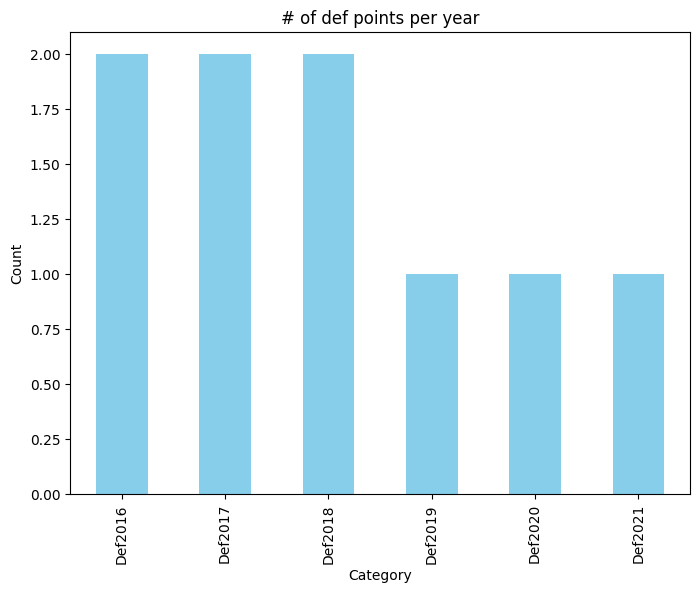

In [187]:
#select the values you want to plot
values_to_plot = ['Def2016','Def2017','Def2018','Def2019','Def2020','Def2021','Def2022']

# Filter the DataFrame to include only the selected values
filtered_df = esbae_ceo[esbae_ceo['Ref_Change_Year_1522'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
defvalue_counts = filtered_df['Ref_Change_Year_1522'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
defvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of def points per year')

# Show the plot
plt.show()

##### plot degradation points by year

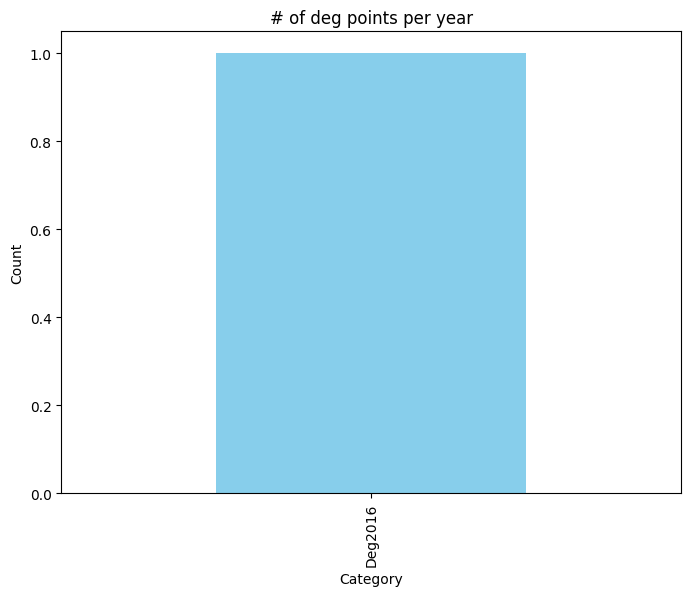

In [188]:
#plot DEG 
#select the values you want to plot
values_to_plot = ['Deg2016','Deg2017','Deg2018','Deg2019','Deg2020','Deg2021','Deg2022']

# Filter the DataFrame to include only the selected values
filtered_df = esbae_ceo[esbae_ceo['Ref_Change_Year_1522'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
degvalue_counts = filtered_df['Ref_Change_Year_1522'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
degvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of deg points per year')

# Show the plot
plt.show()

In [189]:
print(esbae_ceo.columns.values)

['images' 'mon_images' 'bfast_change_date' 'bfast_magnitude' 'bfast_means'
 'cusum_change_date' 'cusum_confidence' 'cusum_magnitude' 'red_mean'
 'red_sd' 'red_min' 'red_max' 'nir_mean' 'nir_sd' 'nir_min' 'nir_max'
 'swir1_mean' 'swir1_sd' 'swir1_min' 'swir1_max' 'swir2_mean' 'swir2_sd'
 'swir2_min' 'swir2_max' 'ndfi_mean' 'ndfi_sd' 'ndfi_min' 'ndfi_max'
 'brightness_mean' 'brightness_sd' 'brightness_min' 'brightness_max'
 'greenness_mean' 'greenness_sd' 'greenness_min' 'greenness_max'
 'wetness_mean' 'wetness_sd' 'wetness_min' 'wetness_max' 'bs_slope_mean'
 'bs_slope_sd' 'bs_slope_max' 'bs_slope_min' 'ewma_jrc_date'
 'ewma_jrc_change' 'ewma_jrc_magnitude' 'mosum_jrc_date'
 'mosum_jrc_change' 'mosum_jrc_magnitude' 'cusum_jrc_date'
 'cusum_jrc_change' 'cusum_jrc_magnitude' 'ccdc_change_date'
 'ccdc_magnitude' 'aspect' 'dw_class_mode' 'dw_tree_prob__max'
 'dw_tree_prob__min' 'dw_tree_prob__stdDev' 'dw_tree_prob_mean'
 'elevation' 'esa_lc20' 'esa_lc21' 'esri_lc17' 'esri_lc18' 'esri_lc19'
 

In [190]:
merged_annual_counts = esbae_ceo['Ref_Change_Year_1522'].value_counts()
merged_annual_counts = merged_annual_counts.sort_index()
merged_annual_counts

Ref_Change_Year_1522
Def2016      2
Def2017      2
Def2018      2
Def2019      1
Def2020      1
Def2021      1
Deg2016      1
NF         143
Stable     250
Name: count, dtype: int64

In [191]:
print(esbae_ceo.dtypes)

images                    int64
mon_images                int64
bfast_change_date       float64
bfast_magnitude         float64
bfast_means             float64
cusum_change_date       float64
cusum_confidence        float64
cusum_magnitude         float64
red_mean                float64
red_sd                  float64
red_min                 float64
red_max                 float64
nir_mean                float64
nir_sd                  float64
nir_min                 float64
nir_max                 float64
swir1_mean              float64
swir1_sd                float64
swir1_min               float64
swir1_max               float64
swir2_mean              float64
swir2_sd                float64
swir2_min               float64
swir2_max               float64
ndfi_mean               float64
ndfi_sd                 float64
ndfi_min                float64
ndfi_max                float64
brightness_mean         float64
brightness_sd           float64
brightness_min          float64
brightne

In [193]:
columns_to_convert = ['Def2016','Def2017','Def2018','Def2019','Def2020','Def2021','Def2022','Deg2016','Deg2017','Deg2018','Deg2019','Deg2020','Deg2021','Deg2022','NF']
esbae_ceo[columns_to_convert] = esbae_ceo[columns_to_convert].fillna(0)
esbae_ceo[columns_to_convert] = esbae_ceo[columns_to_convert].astype(int)

##### export merged esbae and ceo data to one csv file for next step

In [194]:
#esbae_ceo_data_out =  '/home/sepal-user/module_results/esbae/GAB/GAB_esbae_ceo_1522_merge.csv'
#esbae_ceo_data_out =  '/home/sepal-user/module_results/esbae/DRC/DRC_esbae_ceo_1522_merge.csv'
esbae_ceo_data_out =  '/home/sepal-user/module_results/esbae/COG/COG_esbae_ceo_1522_merge.csv'
#esbae_ceo_data_out =  '/home/sepal-user/module_results/esbae/EQG/EQG_esbae_ceo_1522_merge.csv'
#esbae_ceo_data_out =  '/home/sepal-user/module_results/esbae/CMR/CMR_esbae_ceo_1522_merge.csv'
#esbae_ceo_data_out =  '/home/sepal-user/module_results/esbae/CAR/CAR_esbae_ceo_1522_merge.csv'

esbae_ceo.to_csv(esbae_ceo_data_out,index=False)